## VOLITILITY OF TECHNOLOGY STOCKS
 
In this analysis we want to see how volitile is the technology Sector. In this analysis we will try to find the answer to the follwing questions:
- How volitile are tech stocks(APPLE, MICROSOFT, GOOGLE, META, NVIDIA, AMAZON) compared to S&P500?


###   How volitile are tech stocks(APPLE, MICROSOFT, GOOGLE, META, NVIDIA, AMAZON) compared to S&P500?

In [1]:
import pandas as pd
import yfinance as yf # need to import yahoo finance in order download stock data directly from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# created a fn to fetch data
def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)['Adj Close']


# Set date range
start_date = '2000-01-01'
end_date = '2023-12-31'

# List of tech companies and their tickers
tech_companies = {
    'NVIDIA': 'NVDA',
    'Microsoft': 'MSFT',
    'Apple': 'AAPL',
    'Amazon': 'AMZN',
    'Meta': 'META',
}

# Download data
data = pd.DataFrame()
for company, ticker in tech_companies.items():
    data[company] = fetch_data(ticker, start_date, end_date)
data['S&P 500'] = fetch_data('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data

,NVIDIA,Microsoft,Apple,Amazon,Meta,S&P 500
Date,,,,,,
2000-01-03,0.089446,35.935867,0.844004,4.468750,NaN,1455.219971
2000-01-04,0.087058,34.721939,0.772846,4.096875,NaN,1399.420044
2000-01-05,0.084191,35.088055,0.784155,3.487500,NaN,1402.109985
2000-01-06,0.078698,33.912663,0.716296,3.278125,NaN,1403.449951
2000-01-07,0.080012,34.355835,0.750226,3.478125,NaN,1441.469971
...,...,...,...,...,...,...
2023-12-22,48.819527,372.543915,192.868134,153.419998,352.329193,4754.629883
2023-12-26,49.268425,372.623505,192.320221,153.410004,353.764862,4774.750000
2023-12-27,49.406395,372.036713,192.419830,153.339996,356.755829,4781.580078


In [4]:


# Calculating daily returns
returns = data.pct_change().dropna()

# Defining rolling window size (1 year = 252 trading days)
rolling_window = 252

# Calculating rolling volatility (annualized) for each company and S&P 500
rolling_volatility = returns.rolling(window=rolling_window).std() * np.sqrt(252)



In [5]:
returns

,NVIDIA,Microsoft,Apple,Amazon,Meta,S&P 500
Date,,,,,,
2012-05-21,0.017384,0.016399,0.058260,0.019921,-0.109861,0.016036
2012-05-22,-0.012205,0.000336,-0.007679,-0.012746,-0.089039,0.000486
2012-05-23,0.024711,-0.021841,0.024400,0.009056,0.032258,0.001694
2012-05-24,-0.026527,-0.001374,-0.009184,-0.009389,0.032188,0.001380
2012-05-25,0.023947,-0.000344,-0.005360,-0.010918,-0.033909,-0.002166
...,...,...,...,...,...,...
2023-12-22,-0.003266,0.002784,-0.005547,-0.002730,-0.001977,0.001660
2023-12-26,0.009195,0.000214,-0.002841,-0.000065,0.004075,0.004232
2023-12-27,0.002800,-0.001575,0.000518,-0.000456,0.008455,0.001430


In [6]:
rolling_volatility

,NVIDIA,Microsoft,Apple,Amazon,Meta,S&P 500
Date,,,,,,
2012-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,0.495761,0.253069,0.208521,0.333754,0.399889,0.133117
2023-12-26,0.489995,0.251577,0.207017,0.331711,0.398994,0.132270
2023-12-27,0.489806,0.251602,0.206973,0.331391,0.398999,0.132178


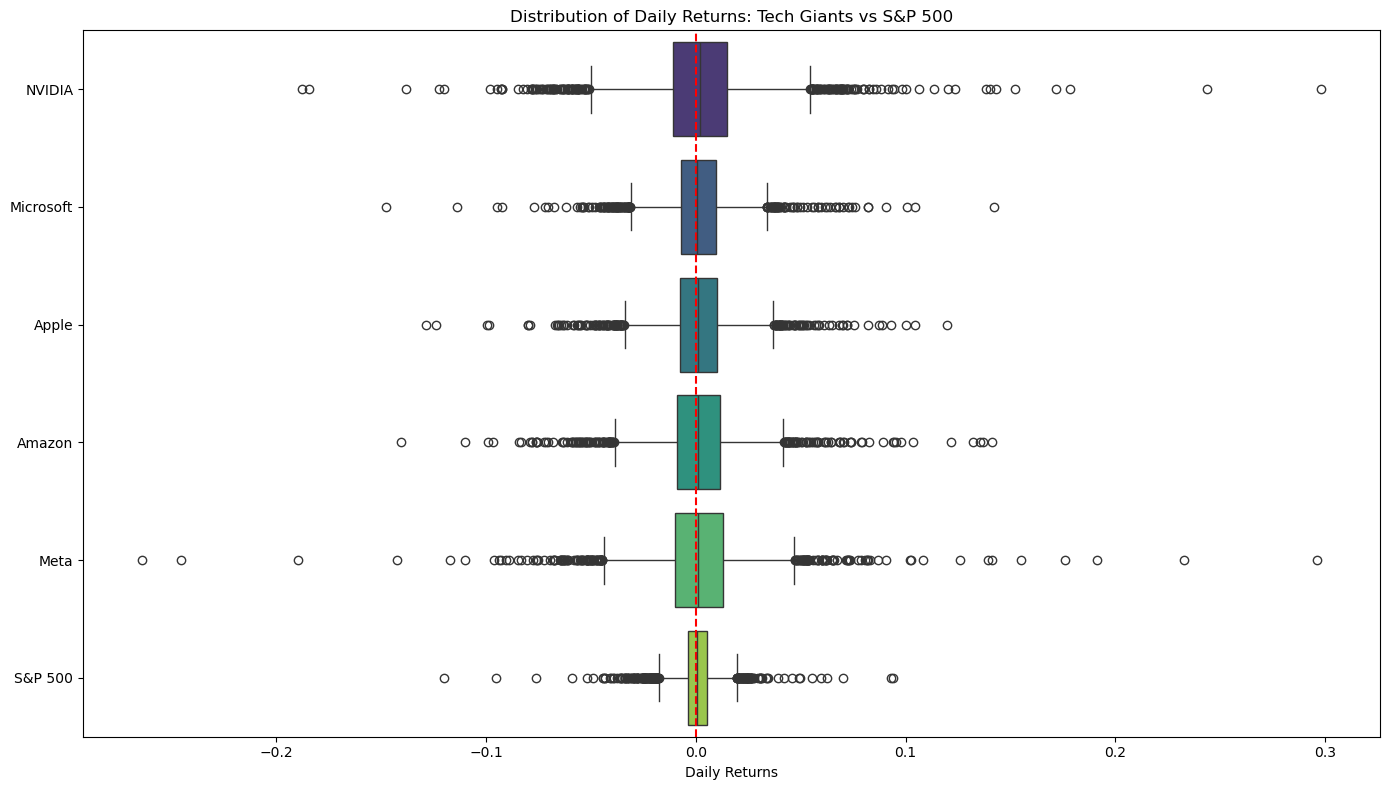

In [7]:

# Creating box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=returns, orient='h', palette='viridis')
plt.title('Distribution of Daily Returns: Tech Giants vs S&P 500')
plt.xlabel('Daily Returns')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()



Nvidia shows the highest volitility with wider box and more spread out data point. Other tech companies are also more volitily as compared to S&P500 which is more smaller box and more closely spread.

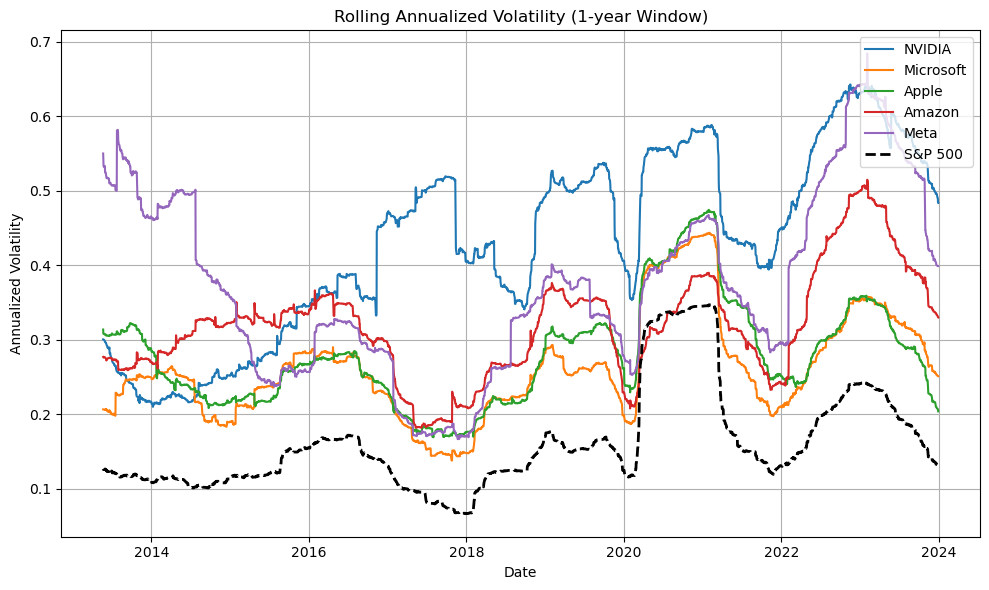

In [8]:
# Ploting rolling volatility for each company compared to S&P 500
plt.figure(figsize=(10, 6))
for company in tech_companies:
    plt.plot(rolling_volatility[company], label=company)
plt.plot(rolling_volatility['S&P 500'], label='S&P 500', color='black', linestyle='--', linewidth=2)
plt.title('Rolling Annualized Volatility (1-year Window)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


From the graph we can clearly see that nvidia is th emost volititle stock i recent times S&P500 beign the least volitile amonth the various tech companies suggestiong the tec sector is usually volitile in comparison.